In [1]:
import lsdb
import astropy.units as u

In [2]:
from distributed import Client

client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 5
Total threads: 10,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:57872,Workers: 5
Dashboard: http://127.0.0.1:8787/status,Total threads: 10
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:57886,Total threads: 2
Dashboard: http://127.0.0.1:57890/status,Memory: 3.20 GiB
Nanny: tcp://127.0.0.1:57875,


In [3]:
ztf = lsdb.read_hats('https://data.lsdb.io/hats/ztf_dr14/ztf_object', margin_cache='https://data.lsdb.io/hats/ztf_dr14/ztf_object_10arcs', columns=["ra", "dec"])

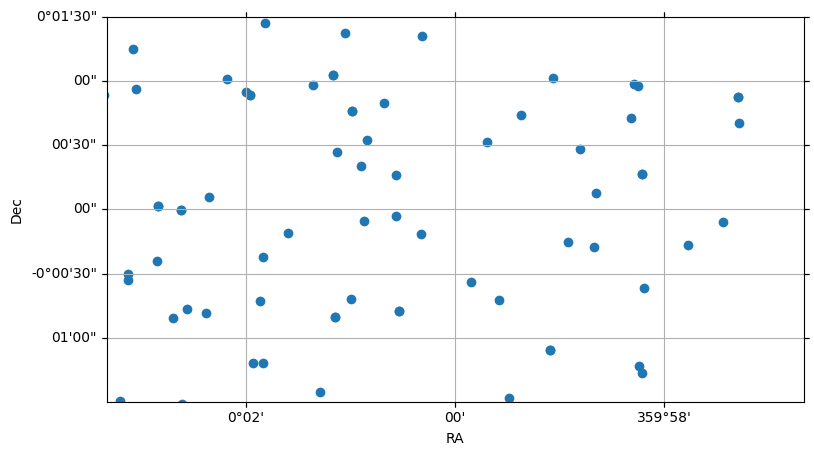

In [8]:
ztf.plot_points(fov=200 * u.arcsec)

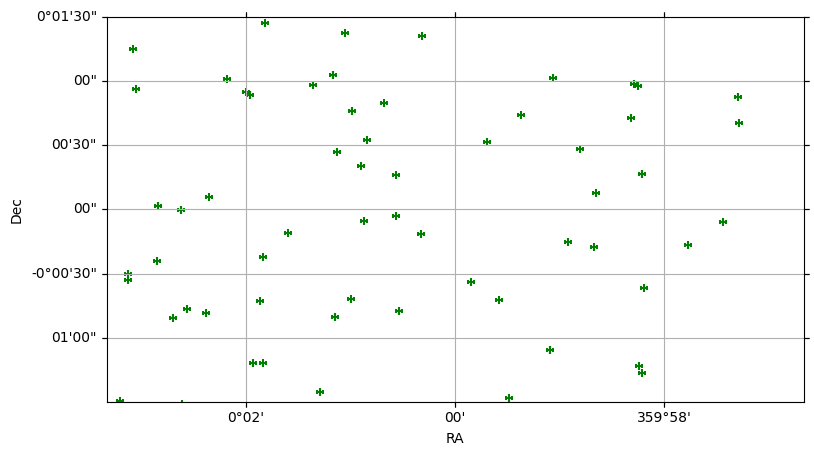

In [9]:
ztf.plot_points(fov=200 * u.arcsec, c="green", marker='+')

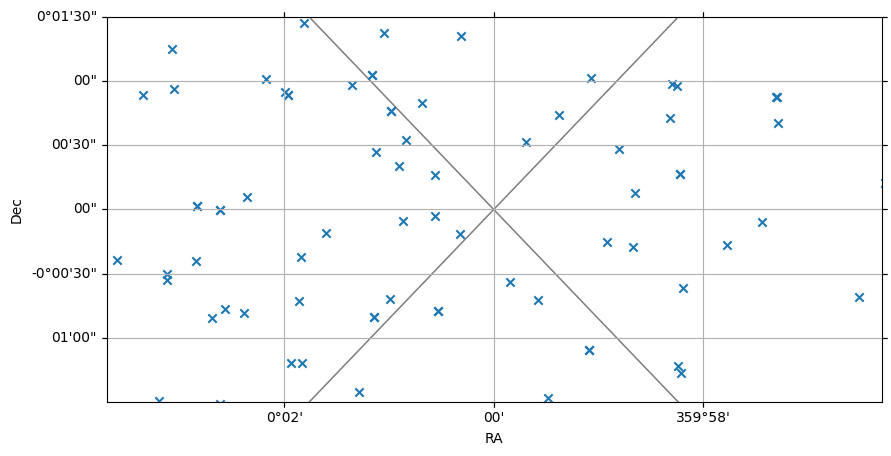

In [6]:
_, ax = ztf.plot_pixels(fov=200 * u.arcsec, color_by_order=False, facecolor='white', edgecolor="grey")
ztf.plot_points(ax=ax, marker='x')

In [4]:
gaia = lsdb.read_hats('https://data.lsdb.io/hats/gaia_dr3/gaia', margin_cache='https://data.lsdb.io/hats/gaia_dr3/gaia_10arcs', columns=["ra", "dec"])

In [5]:
xmatched = ztf.crossmatch(gaia)

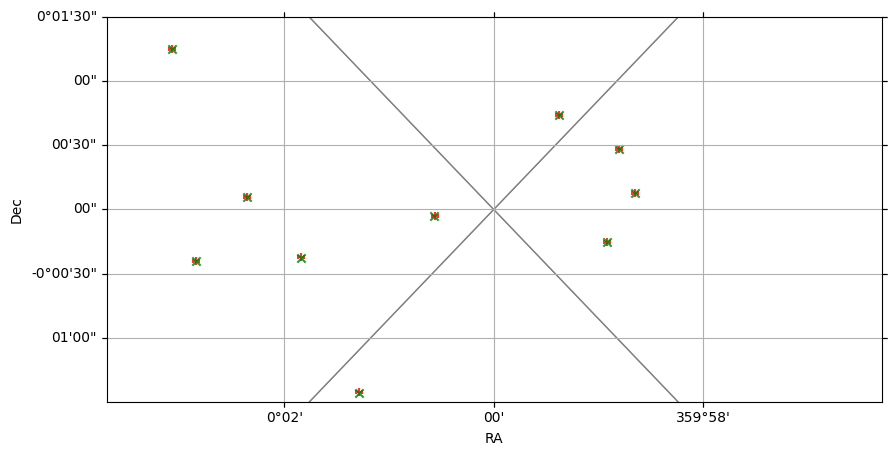

In [7]:
_, ax = xmatched.plot_pixels(fov=200 * u.arcsec, color_by_order=False, facecolor='white', edgecolor="grey")

xmatched.plot_points(ax=ax, additional_ra_columns=["ra_gaia"], additional_dec_columns=["dec_gaia"], marker=["+", "x"], c=["red", "green"], alpha=[0.8, 0.8])

In [8]:
client.close()